## Introdução ao Aprendizado Supervisionado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
df = pd.DataFrame({
    "A": 3,
    "B": pd.Timestamp("20240101"),
    "C": pd.Series(2, index=list(range(4)), dtype="float32"),
    "D": np.array([5] * 4, dtype="int32"),
    "E": pd.Categorical(["train", "test", "test", "train"]),
    "F": "foo"
})

In [3]:
df

,A,B,C,D,E,F
0,3,2024-01-01,2.0,5,train,foo
1,3,2024-01-01,2.0,5,test,foo
2,3,2024-01-01,2.0,5,test,foo
3,3,2024-01-01,2.0,5,train,foo


In [4]:
from sklearn import datasets

iris = datasets.load_iris()
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
import pandas as pd

df = pd.read_csv('data/iris.data')
   
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.columns = [
    'comprim_sepala',
    'largura_sepala',
    'comprim_petala',
    'largura_petala',
    'classe'
]

In [7]:
df.tail()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.iloc[0]

comprim_sepala            4.9
largura_sepala            3.0
comprim_petala            1.4
largura_petala            0.2
classe            Iris-setosa
Name: 0, dtype: object

In [9]:
df['comprim_petala']

0      1.4
1      1.3
2      1.5
3      1.4
4      1.7
      ... 
144    5.2
145    5.0
146    5.2
147    5.4
148    5.1
Name: comprim_petala, Length: 149, dtype: float64

In [10]:
df['comprim_petala'].iloc[0]


df['comprim_petala'].head()

0    1.4
1    1.3
2    1.5
3    1.4
4    1.7
Name: comprim_petala, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comprim_sepala  149 non-null    float64
 1   largura_sepala  149 non-null    float64
 2   comprim_petala  149 non-null    float64
 3   largura_petala  149 non-null    float64
 4   classe          149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df.shape

(149, 5)

In [13]:
df[['largura_sepala', 'largura_petala', 'comprim_petala']]

,largura_sepala,largura_petala,comprim_petala
0,3.0,0.2,1.4
1,3.2,0.2,1.3
2,3.1,0.2,1.5
3,3.6,0.2,1.4
4,3.9,0.4,1.7
...,...,...,...
144,3.0,2.3,5.2
145,2.5,1.9,5.0
146,3.0,2.0,5.2
147,3.4,2.3,5.4


<Axes: >

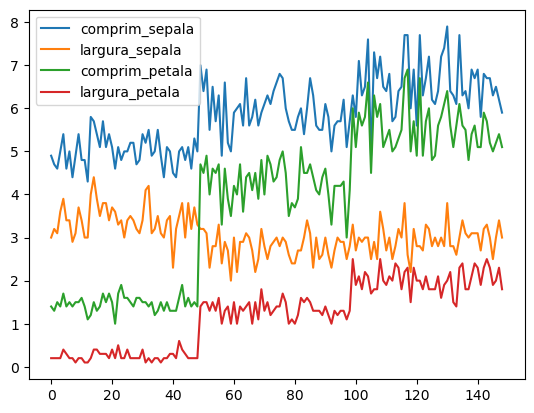

In [14]:
df.plot()

<Axes: >

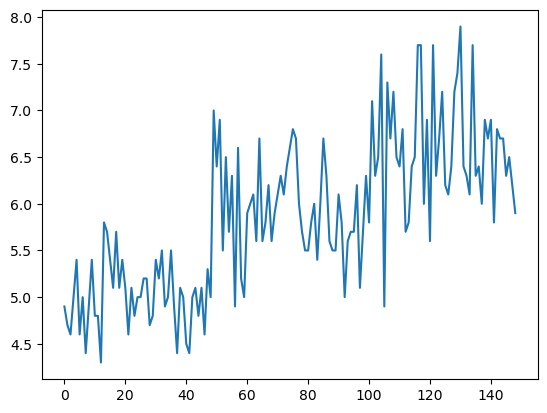

In [15]:
df['comprim_sepala'].plot()

<Axes: ylabel='Frequency'>

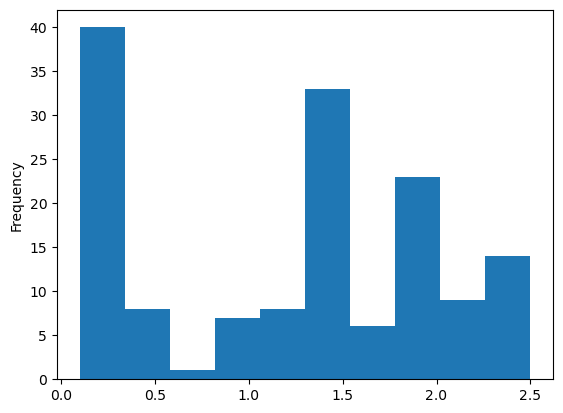

In [16]:
df['largura_petala'].plot(kind='hist')

In [17]:
df['largura_petala'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [18]:
df[df['largura_petala'] == 1.1]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
68,5.6,2.5,3.9,1.1,Iris-versicolor
79,5.5,2.4,3.8,1.1,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor


In [19]:
df.query('largura_petala == 1.1')

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
68,5.6,2.5,3.9,1.1,Iris-versicolor
79,5.5,2.4,3.8,1.1,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor


In [20]:
df[(df['largura_petala']>1.1)&(df['largura_petala']<1.4)]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
52,5.5,2.3,4.0,1.3,Iris-versicolor
54,5.7,2.8,4.5,1.3,Iris-versicolor
57,6.6,2.9,4.6,1.3,Iris-versicolor
63,5.6,2.9,3.6,1.3,Iris-versicolor
70,6.1,2.8,4.0,1.3,Iris-versicolor
72,6.1,2.8,4.7,1.2,Iris-versicolor
73,6.4,2.9,4.3,1.3,Iris-versicolor
81,5.8,2.7,3.9,1.2,Iris-versicolor
86,6.3,2.3,4.4,1.3,Iris-versicolor
87,5.6,3.0,4.1,1.3,Iris-versicolor


In [21]:
df.describe()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 1. Ler o CSV
df = pd.read_csv("heart.csv")  # substitua pelo seu caminho do CSV

# 🔹 2. Conferir dados
print("Primeiras linhas:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())

# 🔹 3. Separar features e target
X = df.drop("target", axis=1)
y = df["target"]

# 🔹 4. Normalizar/Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 5. Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 6. Treinar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 🔹 7. Avaliar modelo
y_pred = modelo.predict(X_test)

print("\n✅ Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\n📊 Relatório de classificação:")
print(classification_report(y_test, y_pred))
print("\n🧮 Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

# 🔹 8. Testar predição localmente
# Exemplo: pegar o último paciente do dataset
ultimo_X = X_scaled[-1].reshape(1, -1)
predicao = modelo.predict(ultimo_X)[0]
print("\n📈 Predição do último paciente (1 = doença, 0 = saudável):", predicao)


Primeiras linhas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64

In [29]:
def predict_patient(model, scaler, paciente_dict):
    import numpy as np
    # converter dicionário em DataFrame
    df = pd.DataFrame([paciente_dict])
    # normalizar
    X_scaled = scaler.transform(df)
    # predizer
    pred = model.predict(X_scaled)[0]
    return pred

# Exemplo de uso
paciente = {
    "age": 54, "sex": 0, "cp": 1, "trestbps": 130, "chol": 230, "fbs": 0,
    "restecg": 1, "thalach": 140, "exang": 0, "oldpeak": 1.5, "slope": 2,
    "ca": 0, "thal": 2
}

print("Predição:", predict_patient(modelo, scaler, paciente))

Predição: 1
